Stations:
s0 (73, 4) (15, 2, 0.6)
s1 (50, 53) (10, 2, 0.5)
s2 (46, 56) (15, 2, 0.6)
s3 (90, 30) (10, 2, 0.5)
s4 (18, 60) (15, 2, 0.6)
s5 (51, 80) (25, 1, 0.9)
s6 (10, 72) (10, 2, 0.5)
s7 (71, 46) (20, 1, 0.8)
s8 (75, 56) (15, 2, 0.6)
s9 (27, 17) (25, 1, 0.9)
s10 (81, 95) (15, 2, 0.6)
s11 (96, 28) (25, 1, 0.9)
s12 (42, 46) (10, 2, 0.5)
s13 (7, 100) (20, 1, 0.8)
s14 (75, 99) (15, 2, 0.6)
s15 (61, 92) (25, 1, 0.9)
s16 (49, 14) (20, 1, 0.8)
s17 (13, 41) (25, 1, 0.9)
s18 (19, 44) (15, 2, 0.6)
s19 (95, 35) (15, 2, 0.6)
s20 (25, 11) (20, 1, 0.8)
s21 (6, 19) (15, 2, 0.6)
s22 (73, 95) (15, 2, 0.6)
s23 (22, 45) (10, 2, 0.5)
s24 (65, 56) (20, 1, 0.8)
Centers:
c0 (30, 49) (150, 2, 0.5)
c1 (68, 92) (175, 1, 0.5)
c2 (80, 36) (150, 2, 0.5)
c3 (8, 86) (150, 2, 0.5)
c4 (26, 15) (150, 2, 0.5)
Edges (center to center):
('c0', 'c1', 14.346166735403573, 11.476933388322859)
('c1', 'c0', 14.346166735403573, 11.476933388322859)
('c0', 'c2', 12.91559135308949, 10.332473082471592)
('c2', 'c0', 12.91559135308949

<>:436: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:436: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?


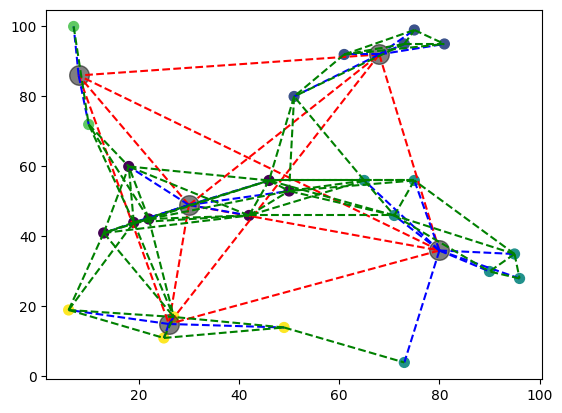

Packets:
c6798fab-349d-4e7f-84ec-cfbcee062200 (1.9612186646590595, 's7', 's11', 1)
51b6b095-348e-45be-aa9d-7ca4a4e58ec5 (2.1767130861909796, 's11', 's2', 0)
3739cf11-8468-4498-9502-bec71365e4ce (10.103598039562499, 's12', 's1', 0)
a0a5cea7-7393-43c5-8685-e00a749faccb (10.536095321815864, 's7', 's23', 1)
8b1562a6-8638-4c68-9fbf-6b228cc25822 (11.883079653846162, 's16', 's21', 0)


/var/folders/85/h9zn7p197rv7q9qq734vvvsr0000gn/T/ipykernel_14367/2328297605.py:436: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  package_priority = 0 if package.category is "Standard" else "Express"


In [3]:
import heapq
import random
import numpy as np
import matplotlib.pyplot as plt
import uuid
from sklearn.cluster import KMeans


parameters = {
    "station_num": 25,
    "center_num": 5,
    "packet_num": 5,
}


def data_gen():
    # Generate Stations
    station_pos = []
    # properties are defined here: throughput/tick, time_delay, money_cost
    station_prop_candidates = [
        (10, 2, 0.5), (15, 2, 0.6), (20, 1, 0.8), (25, 1, 0.9)]
    station_prop = []
    for i in range(parameters["station_num"]):
        # Map size is defined here, which is 100*100
        station_pos.append((random.randint(0, 100), random.randint(0, 100)))
        station_prop.append(
            station_prop_candidates[random.randint(0, len(station_prop_candidates)-1)])
    # Output Stations
    print("Stations:")
    for i in range(len(station_pos)):
        print(f"s{i}", station_pos[i], station_prop[i])

    # Generate Centers by clustering
    kmeans = KMeans(n_clusters=parameters["center_num"])
    kmeans.fit(station_pos)
    station_labels = kmeans.predict(station_pos)
    center_pos = [(int(x[0]), int(x[1])) for x in kmeans.cluster_centers_]
    for i in range(len(center_pos)):
        while center_pos[i] in station_pos:
            # move slightly if center is overlapped with station
            # you can also use other methods to avoid this situation
            print("Warning: Center moved")
            center_pos[i] = center_pos[i][0] + 1, center_pos[i][1] + 1
    # properties are defined here: throughput/tick, time_delay, money_cost
    center_prop_candidates = [
        (100, 2, 0.5), (150, 2, 0.5), (125, 1, 0.5), (175, 1, 0.5)]
    center_prop = []
    for i in range(parameters["center_num"]):
        center_prop.append(
            center_prop_candidates[random.randint(0, len(center_prop_candidates)-1)])
    # Output Centers
    print("Centers:")
    for i in range(parameters["center_num"]):
        print(f"c{i}", center_pos[i], center_prop[i])

    # Draw Stations and Centers
    plt.scatter([x[0] for x in station_pos], [x[1]
                for x in station_pos], c=station_labels, s=50, cmap='viridis')
    plt.scatter([x[0] for x in center_pos], [x[1]
                for x in center_pos], c='black', s=200, alpha=0.5)

    # Generate Edges
    edges = []
    print("Edges (center to center):")      # Airlines
    for i in range(parameters["center_num"]):
        for j in range(parameters["center_num"]):
            if j > i:
                dist = np.linalg.norm(
                    np.array(center_pos[i]) - np.array(center_pos[j]))
                # src, dst, time_cost, money_cost
                # time_cost and money_cost are defined here
                edges.append((f"c{i}", f"c{j}", 0.25 * dist, 0.2 * dist))
                edges.append((f"c{j}", f"c{i}", 0.25 * dist, 0.2 * dist))
                plt.plot([center_pos[i][0], center_pos[j][0]], [
                         center_pos[i][1], center_pos[j][1]], 'r--')
                print(edges[-2])
                print(edges[-1])
    print("Edges (center to station):")     # Highways
    for i in range(parameters["center_num"]):
        for j in range(parameters["station_num"]):
            if station_labels[j] == i:
                dist = np.linalg.norm(
                    np.array(center_pos[i]) - np.array(station_pos[j]))
                # time_cost and money_cost are defined here
                edges.append((f"c{i}", f"s{j}", 0.6 * dist, 0.12 * dist))
                edges.append((f"s{j}", f"c{i}", 0.6 * dist, 0.12 * dist))
                plt.plot([center_pos[i][0], station_pos[j][0]], [
                         center_pos[i][1], station_pos[j][1]], 'b--')
                print(edges[-2])
                print(edges[-1])
    print("Edges (station to station):")    # Roads
    for i in range(parameters["station_num"]):
        for j in range(parameters["station_num"]):
            if i > j and (np.linalg.norm(np.array(station_pos[i]) - np.array(station_pos[j])) < 30):
                dist = np.linalg.norm(
                    np.array(station_pos[i]) - np.array(station_pos[j]))
                # time_cost and money_cost are defined here
                edges.append((f"s{i}", f"s{j}", 0.8 * dist, 0.07*dist))
                edges.append((f"s{j}", f"s{i}", 0.8 * dist, 0.07*dist))
                plt.plot([station_pos[i][0], station_pos[j][0]], [
                         station_pos[i][1], station_pos[j][1]], 'g--')
                print(edges[-2])
                print(edges[-1])
    plt.show()

    # Generate Packets
    packets = []
    src_prob = np.random.random(parameters["station_num"])
    src_prob = src_prob / np.sum(src_prob)
    dst_prob = np.random.random(parameters["station_num"])
    dst_prob = dst_prob / np.sum(dst_prob)
    # Package categories are defined here: 0 for Regular, 1 for Express
    speed_prob = [0.7, 0.3]
    print("Packets:")
    for i in range(parameters["packet_num"]):      # Number of packets
        src = np.random.choice(parameters["station_num"], p=src_prob)
        dst = np.random.choice(parameters["station_num"], p=dst_prob)
        while dst == src:
            dst = np.random.choice(parameters["station_num"], p=dst_prob)
        category = np.random.choice(2, p=speed_prob)
        # Create time of the package, during 12 time ticks(hours). Of course you can change it.
        create_time = np.random.random() * 12
        packets.append((create_time, f"s{src}", f"s{dst}", category))
    # Sort packets by create time
    packets.sort(key=lambda x: x[0])
    # Output Packets
    for packet in packets:
        print(uuid.uuid4(), packet)

    M=np.zeros((60,60))
    for i in range(60):
        for j in range(60):
            M[i][j]=np.Infinity
    for i in range(30):
        M[2*i][2*i+1]=0.01
    for i in range(parameters["center_num"]):               #要处理的还有M[2*i][2*i+1]
        for j in range(parameters["center_num"]):
            if j > i:
                M[2*i+1][2*j] = 0.25*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(center_pos[j]))
                M[2*j+1][2*i] = M[2*i+1][2*j]
    for i in range(parameters["center_num"]):
        for j in range(parameters["station_num"]):
            if station_labels[j] == i:
                M[2*i+1][2*j+10] = 0.6*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(station_pos[j]))
                M[2*j+11][2*i] = M[2*i+1][2*j+10]
    for i in range(parameters["station_num"]):
        for j in range(parameters["station_num"]):
            if i > j and (np.linalg.norm(np.array(station_pos[i]) - np.array(station_pos[j])) < 30):
                M[2*i+11][2*j+10] = 0.8*np.linalg.norm(
                    np.array(station_pos[i]) - np.array(station_pos[j]))
                M[2*j+11][2*i+10]=M[2*i+11][2*j+10]
    N=np.zeros((60,60))
    for i in range(60):
        for j in range(60):
            N[i][j]=np.Infinity
    for i in range(parameters["center_num"]):               #要处理的还有M[2*i][2*i+1]
        for j in range(parameters["center_num"]):
            if j > i:
                N[2*i+1][2*j] = 0.2*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(center_pos[j]))
                N[2*j+1][2*i] = N[2*i+1][2*j]
    for i in range(parameters["center_num"]):
        for j in range(parameters["station_num"]):
            if station_labels[j] == i:
                N[2*i+1][2*j+10] = 0.12*np.linalg.norm(
                    np.array(center_pos[i]) - np.array(station_pos[j]))
                N[2*j+11][2*i] = N[2*i+1][2*j+10]
    for i in range(parameters["station_num"]):
        for j in range(parameters["station_num"]):
            if i > j and (np.linalg.norm(np.array(station_pos[i]) - np.array(station_pos[j])) < 30):
                N[2*i+11][2*j+10] = 0.07*np.linalg.norm(
                    np.array(station_pos[i]) - np.array(station_pos[j]))
                N[2*j+11][2*i+10]=N[2*i+11][2*j+10]
    for i in range(parameters["center_num"]):
        N[2*i][2*i+1]=center_prop[i][2]
    for i in range(parameters["station_num"]):
        N[2*i+10][2*i+11]=station_prop[i][2]

    return {
        "station_pos": station_pos,
        "station_prop": station_prop,
        "center_pos": center_pos,
        "center_prop": center_prop,
        "edges": edges,
        "packets": packets,
        "money cost":M,
        "time cost":N,
    }

#generate stations, centers, packages.
data = data_gen()
station_pos = data['station_pos']
station_prop = data['station_prop']
center_pos = data['center_pos']
center_prop = data['center_prop']
edges = data['edges']
packets = data['packets']
moneycost=data["money cost"]
timecost=data["time cost"]
class Node:
    def __init__(self, id, pos, throughput, delay, cost, is_station=False):
        self.id = id
        self.pos = pos
        self.throughput = throughput
        self.delay = delay  # This delay should be updated based on the queue length and throughput
        self.cost = cost
        self.is_station = is_station
        self.packages = []  # Use a list for packages
        heapq.heapify(self.packages)  # Convert the list to a heap
        self.package_indices = {}  # 辅助字典用于快速查找包裹的索引

    def add_package(self, package):
        heapq.heappush(self.packages, (-package.delay, package))
        package.delay = self.delay
        self.package_indices[package.id] = len(self.packages) - 1  # 更新辅助字典
        print(f"Pack added to Node: {self.id};")

    def remove_package(self, package_id):
        if package_id in self.package_indices:
            index = self.package_indices.pop(package_id)
            # 直接移除指定索引的元素，并重新构建堆
            del self.packages[index]
            heapq.heapify(self.packages)
            self.package_indices = {pkg.id: i for i, (_, pkg) in enumerate(self.packages)}
            print(f"package: {package_id} removed from Node: {self.id}.")

    def __str__(self):
        # 获取所有包裹的 ID
        package_ids = [pkg.id for _, pkg in self.packages]
        # 将包裹 ID 转换为字符串并附加到节点信息中
        return f"Node({self.id}, {self.pos}, Throughput: {self.throughput}, Delay: {self.delay}, Cost: {self.cost}, Packages: {package_ids})"

class Route:
    def __init__(self, src, dst, time, cost):
        self.src = src
        self.dst = dst
        self.time = time
        self.cost = cost
        self.packages = []  # Use a list for packages on the route
        heapq.heapify(self.packages)  # Convert the list to a heap
        self.package_indices = {}  # 辅助字典用于快速查找包裹的索引

    def add_package(self, package):
        package.delay = self.time
        heapq.heappush(self.packages, (-package.delay, package))
        self.package_indices[package.id] = len(self.packages) - 1  # 更新辅助字典
        print(f"Pack added to Route: {self.src}->{self.dst};")

    def remove_package(self, package_id):
        if package_id in self.package_indices:
            index = self.package_indices.pop(package_id)
            # 直接移除指定索引的元素，并重新构建堆
            del self.packages[index]
            heapq.heapify(self.packages)
            self.package_indices = {pkg.id: i for i, (_, pkg) in enumerate(self.packages)}
            print(f"package: {package_id} removed from Route: {self.src}->{self.dst}.")

    def __str__(self):
        return f"Route({self.src}->{self.dst}, Time: {self.time}, Cost: {self.cost})"

class Package:
    def __init__(self, id, time_created, src, dst, category):
        self.id = id
        self.time_created = time_created
        self.src = src
        self.dst = dst
        self.curr = src
        self.category = category  # 'Express' or 'Standard'
        self.history = []  # List of nodes visited with timestamps
        self.path = []  # List of nodes on the expected path
        self.delay = 0  # Remaining delay before processing
        self.done = False
        self.reward = 0.0  # Current Reward/cost for this package

    def update_path(self, next_node):
        self.path.append(next_node)

    def mark_done(self):
        self.done = True

    def __lt__(self, other):
        # Ensure other is also a Package object
        if not isinstance(other, Package):
            return False

        # Define comparison for priority queue
        # Express packages have higher priority 
        if self.category == 'Express' and other.category != 'Express':
            return True
        if self.category != 'Express' and other.category == 'Express':
            return False
        # Otherwise, compare based on time created
        return self.time_created < other.time_created

    def __eq__(self, other):
        # Ensure other is also a Package object
        if not isinstance(other, Package):
            return False

        # Define comparison for priority queue
        # Express packages have higher priority
        if self.category == 'Express' and other.category != 'Express':
            return True
        if self.category != 'Express' and other.category == 'Express':
            return False
        # Otherwise, compare based on time created
        return self.time_created == other.time_created

    def __str__(self):
        #return f"Package({self.id}, TimeCreated: {self.time_created}, Src: {self.src}, Dst: {self.dst}, Category: {self.category})"
        return f"Package({self.id}, Curr: {self.curr}, His: {self.history}, Path: {self.path})"

class LogisticsEnv:
    def __init__(self):
        self.nodes = {}  # Dictionary of nodes
        self.routes = {}  # Dictionary of routes
        self.packages = {}  # Dictionary of packages
        self.min_delay = float('inf')  # Minimum delay for all packages
        self.TimeTick = 0.0  # Current time tick
        self.done = False
        self.moneycost=moneycost
        self.timecost=timecost


    def reset(self):
        self.nodes = {}  # Dictionary of nodes
        self.routes = {}  # Dictionary of routes
        self.packages = {}  # Dictionary of packages

        # Initialize nodes, routes, and packages
        # Add stations as nodes
        for i in range(len(station_pos)):
            p = self.add_node(f"s{i}", station_pos[i], *station_prop[i], is_station=True)
            #print(f"Center({p.id}, {p.pos}, Throughput: {p.throughput}, Delay: {p.delay}, Cost: {p.cost}), is_station: {p.is_station}")

        # Add centers as nodes
        for i in range(len(center_pos)):
            p = self.add_node(f"c{i}", center_pos[i], *center_prop[i])
            #print(f"Center({p.id}, {p.pos}, Throughput: {p.throughput}, Delay: {p.delay}, Cost: {p.cost}), is_station: {p.is_station}")

        # Add edges as routes
        for edge in edges:
            p = self.add_route(edge[0], edge[1], edge[2], edge[3])
            #print(f"Route({p.src}->{p.dst}, Time: {p.time}, Cost: {p.cost})")

        # Add packets as packages
        for packet in packets:
            p = self.add_package(uuid.uuid4(), *packet)
            print(f"Package {p.id} added, delay={p.delay}, src={p.src}, curr={p.curr}, dst={p.dst}, done={p.done}, path={p.path}")
        
        for package in self.packages.values():
            self.min_delay = package.delay if self.min_delay>package.delay and package.delay>0 else self.min_delay
        for node in self.nodes.values():
            print(node)
        self.TimeTick = 0.0  # Current time tick
        print(f"Env reset. min_delay={self.min_delay}, TimeTick={self.TimeTick}")
        self.moneycost=moneycost
        self.timecost=timecost

        return self.get_state()

    def add_node(self, id, pos, throughput, delay, cost, is_station=False):
        self.nodes[id] = Node(id, pos, throughput, delay, cost, is_station)
        return self.nodes[id]

    def add_route(self, src, dst, time, cost):
        self.routes[(src, dst)] = Route(src, dst, time, cost)
        return self.routes[(src, dst)]

    def add_package(self, id, time_created, src, dst, category):
        package = Package(id, time_created, src, dst, category)
        
        # Calculate the initial optimal路径 based on the package's category
        if category == 'Express':
            # 对于Express包裹，找到最短的总时间路径
            optimal_path = self.find_shortest_time_path(src, dst)
        else:
            # 对于Standard包裹，找到最低的总成本路径
            optimal_path = self.find_lowest_cost_path(src, dst)
        
        package.path = optimal_path  # 将最优路径初始化为包裹的路径
        self.packages[id] = package
        self.nodes[src].add_package(package)  # 添加到优先队列中
        return package
   
    def find_shortest_time_path(self, src, dst):
        if src[0]=='s':
            if len(src)==2:
                a=int(src[1])*2+10
            else:
                a=int(src[1:])*2+10
        else:
            a=int(src[1])*2
        if dst[0]=='s':
            if len(dst)==2:
                b=int(dst[1])*2+10
            else:
                b=int(dst[1:])*2+10
        else:
            b=int(dst[1])*2

        n=len(self.timecost)#ordre du graphe
        Delta=[np. Infinity]*n#étape 1
        Chemins=[[]]*n# liste des listes des plus courts chemins
        Delta[a]=0  #étape 1
        Chemins[a]=[a] #plus court chemin de s0 à s0
        for k in range(n-1): #étape 2
            for i in range(n): #étape 3
                for j in range(n): #étape 3
                    if self.timecost[ i ][ j]!=0 and Delta[ i]+self.timecost[ i ][ j]<Delta[ j ]: #ét. 4
                        Delta[ j]=Delta[ i]+self.timecost[ i ][ j ] #étape 4
                        Chemins[ j]=Chemins[ i ]+[j ] #chemin plus court
        d=Chemins
        path=[]
        for i in range(int((len(d[b])+1)/2)):
            if d[b][2*i]>9:
                path.append('s'+str((d[b][2*i]-10)/2))
            else :
                path.append('c'+str(d[b][2*i]/2)) 
        return path 
    
        
    
    def find_lowest_cost_path(self,src, dst):
        if src[0]=='s':
            if len(src)==2:
                a=int(src[1])*2+10
            else:
                a=int(src[1:])*2+10
        else:
            a=int(src[1])*2
        if dst[0]=='s':
            if len(dst)==2:
                b=int(dst[1])*2+10
            else:
                b=int(dst[1:])*2+10
        else:
            b=int(dst[1])*2

        n=len(self.moneycost)#ordre du graphe
        Delta=[np. Infinity]*n#étape 1
        Chemins=[[]]*n# liste des listes des plus courts chemins
        Delta[a]=0  #étape 1
        Chemins[a]=[a] #plus court chemin de s0 à s0
        for k in range(n-1): #étape 2
            for i in range(n): #étape 3
                for j in range(n): #étape 3
                    if self.moneycost[ i ][ j]!=0 and Delta[ i]+self.moneycost[ i ][ j]<Delta[ j ]: #ét. 4
                        Delta[ j]=Delta[ i]+self.moneycost[ i ][ j ] #étape 4
                        Chemins[ j]=Chemins[ i ]+[j ] #chemin plus court
        d=Chemins
        path=[]
        for i in range(int((len(d[b])+1)/2)):
            if d[b][2*i]>9:
                path.append('s'+str(int((d[b][2*i]-10)/2)))
            else :
                path.append('c'+str(int(d[b][2*i]/2))) 
        return path 

    def get_policy(self, package):
        if package.category == 'Express':
            # For Express packages, find the shortest total time path
            return self.find_shortest_time_path(package.curr, package.dst)
        else:
            # For Standard packages, find the lowest total cost path
            return self.find_lowest_cost_path(package.curr, package.dst)

    def step(self, actions):
        self.TimeTick += self.min_delay  # 更新时间
        # 更新所有包裹的延迟
        for package in self.packages.values():
            package.delay -= self.min_delay
        # 遍历所有动作
        for package_id, action in actions.items():
            print(f"STEP:::PacakgeID={package_id}, Action={action}")
            package = self.packages[package_id]  # 使用 package_id 获取包裹
            if package.done:
                package.reward = 0
                continue
            elif package.delay <= 0:  # 包裹准备好转移状态
                if action is not None:
                    node = self.nodes[action[0]]
                    next_node = self.nodes[action[1]]
                    route = self.routes[(action[0], action[1])]
                    if package_id in node.package_indices:  # 包裹位于Node
                        print(f"is in Node: {node.id},")
                        node.remove_package(package_id)
                        route.add_package(package)
                        # 更新包裹的历史、当前所在的节点
                        package.history.append((self.TimeTick, package.curr))
                        package.curr = node.id
                        # 计算包裹的reward
                        if package.category == 'Express':
                            package.reward -= self.min_delay
                        else:
                            package.reward -= node.cost
                    elif package_id in route.package_indices:  # 包裹位于Route TODO debug, it is likely to occur here!!! Check if the package at the end of the Route will be correctly updated to the next node.
                        print(f"is on Route: {route.src}->{route.dst},")
                        if len(node.packages) < node.throughput:
                            route.remove_package(package_id)
                            next_node.add_package(package)
                            # 更新包裹的历史、Route起点的节点
                            package.history.append((self.TimeTick, package.curr))
                            package.curr = next_node.id
                            # 计算包裹的reward
                            if package.category == 'Express':
                                package.reward -= self.min_delay
                            else:
                                package.reward -= route.cost
                        else: # 包裹滞留在当前Route无法进站
                            print(f"waiting..., Node: {route.dst} full")
                            if package.category == 'Express':
                                package.reward -= self.min_delay
                    else:
                        print("Error! Undone package is neither on route or in node!")
                        return 0
                else:  # 包裹准备好转移状态，但动作是None
                    print(f"This should not happen! Package: {package_id} is ready but action is None.")
                    if package.category == 'Express':
                        package.reward -= self.min_delay
            else:
                print(f"Package: {package_id} processing...")
                # package正在Route或者Node中处理
                if package.category == 'Express':
                    package.reward -= self.min_delay
        #判断是否有新的package变成done,顺便计算当前的reward,顺便判断是否done
        self.done = True
        curr_reward = 0
        self.min_delay = float('inf')
        for package in self.packages.values():
            if not package.done: #对于之前没有done的package
                curr_reward +=package.reward #累加reward
                if package.curr == package.dst: #该节点是否刚到done
                    package.history.append((self.TimeTick, package.curr))
                    next_node.remove_package(package_id)
                    package.done = True
                    package.delay = float('inf')
                else:
                    self.done = False #如果还有undone package，那么整个环境就没有done
                    #print(f"undone package {package.id} at {package.curr} has delay: {package.delay}")
                    self.min_delay = package.delay if package.delay>0 and (package.delay < self.min_delay) else self.min_delay
        print(f"the new min_delay: {self.min_delay}")
        return self.get_state(), curr_reward, self.done

    def get_reward(self, package):
        # Calculate the reward based on package category and time passed
        if package.category == 'Express':
            reward = package.time_created - self.TimeTick #TODO re-scale the reward to be compatible with the route cost
        else:
            # Calculate the cost based on package history and node/route costs
            total_cost = 0
            for timestamp,node_id in package.history:
                total_cost += self.nodes[node_id].cost
            for route in package.path:
                total_cost += self.routes[route].cost
            reward = -total_cost  # Negative cost as a reward for minimizing costs

        # If the package has reached its destination, update its delay to zero and mark it as done
        if package.src == package.dst:
            package.delay = 0
            package.mark_done()

        return reward
    
    def get_state(self):
        # Create a state representation that includes relevant information for decision-making
        state = {
            'package_positions': self.get_package_positions(),
            'package_destinations': self.get_package_destinations(),
            'package_categories': self.get_package_categories(),
            'queue_lengths': self.get_queue_lengths(),
            'route_loads': self.get_route_loads(),
            'node_loads' : self.get_node_loads(),
            'current_time_tick': self.TimeTick,
            'money_cost':self.moneycost,
            'time_cost':self.timecost
        }
        return state

    def get_package_positions(self):
        # Return a dictionary with package IDs as keys and their current node IDs as values
        positions = {pkg_id: pkg.src for pkg_id, pkg in self.packages.items()}
        return positions

    def get_package_destinations(self):
        # Return a dictionary with package IDs as keys and their destination node IDs as values
        destinations = {pkg_id: pkg.dst for pkg_id, pkg in self.packages.items()}
        return destinations

    def get_package_categories(self):
        # Return a dictionary with package IDs as keys and their categories as values
        categories = {pkg_id: pkg.category for pkg_id, pkg in self.packages.items()}
        return categories

    def get_queue_lengths(self):
        # Return a dictionary with node IDs as keys and the number of packages in their queues as values
        queue_lengths = {node_id: len(node.packages) for node_id, node in self.nodes.items()}
        return queue_lengths

    def get_route_loads(self):
        # Return a dictionary with route tuples (src, dst) as keys and the number of packages on the route as values
        route_loads = {route_tuple: len(route.packages) for route_tuple, route in self.routes.items()}
        return route_loads
    
    def get_node_loads(self):
        # 创建一个字典来存储每个站点的包裹数量
        stations_packages_number = {}
        # 遍历所有节点
        for node_id, node in self.nodes.items():
            # 计算每个节点的包裹数量
            stations_packages_number[node_id] = len(node.packages)
        # 返回包含每个站点包裹数量的字典
        return stations_packages_number
    
    def route(self,package_id):
        package = self.packages[package_id]
        stations_base = self.nodes
        stations_packages_number = self.get_node_loads()
        routes_packages_number = self.get_route_loads()
        package_from = package.src #最初的起点。如果学长想要的是当前位置，可以用package.curr
        package_to = package.dst
        package_priority = 0 if package.category is "Standard" else "Express"

        route = {
            stations_base,
            stations_packages_number,
            routes_packages_number,
            package_from,
            package_to,
            package_priority
        }

        return route

class Agent:
    def __init__(self, env):
        self.env = env
        self.state = None
        self.total_reward = 0.0
        self.action_history = []

    def reset(self):
        self.state = None
        self.total_reward = 0.0
        self.action_history = []

    def choose_action(self):
        actions = {}
        for package_id, package in self.env.packages.items():
            if package.delay > self.env.min_delay:
                # If the package's delay is positive, do nothing
                actions[package_id] = None
            else:
                # Call the get_policy method to get the next node in the optimal path
                next_node = self.env.get_policy(package)
                # Select the neighboring node to be the destination
                if next_node and next_node != package.src and next_node != package.dst:
                    actions[package_id] = next_node[:2]
                else:
                    actions[package_id] = None  # No valid action found
            #print(f"action for {package_id} is {actions[package_id]}.")
        return actions

In [4]:
env = LogisticsEnv()
state = env.reset()

# 创建代理
agent = Agent(env)

# 模拟几个时间步
i=0
done = False
while (not done):
    i+=1
    print(f"------------------------------------------------------STEP{i}------------------------------------------------------")
    actions = agent.choose_action()
    next_state, reward, done = env.step(actions)
    for package_id, package in env.packages.items():
        print(package)
    print(f"Time tick: {env.TimeTick}, Total reward: {reward}")

# 检查所有包是否已到达目的地
for package_id in env.packages:
    package = env.packages[package_id]
    if not package.done:
        print(f"Package {package_id} did not reach the destination.")
        break
else:
    print("All packages have reached the destination.")

Pack added to Node: s7;
Package 90b8b7b7-b866-43ae-adc9-82e868703753 added, delay=1, src=s7, curr=s7, dst=s11, done=False, path=['s7', 'c2', 's11']
Pack added to Node: s11;
Package 5959967e-8f8d-416a-bef7-654c985fac12 added, delay=1, src=s11, curr=s11, dst=s2, done=False, path=['s11', 'c2', 'c0', 's2']
Pack added to Node: s12;
Package f6b858df-b5cc-45d0-b0a2-d0adddbf1030 added, delay=2, src=s12, curr=s12, dst=s1, done=False, path=['s12', 's1']
Pack added to Node: s7;
Package abadcbe2-1154-4470-94d3-fc1fcff445a0 added, delay=1, src=s7, curr=s7, dst=s23, done=False, path=['s7', 'c2', 'c0', 's23']
Pack added to Node: s16;
Package be5ef552-c33b-46fe-ab62-f885e7668388 added, delay=1, src=s16, curr=s16, dst=s21, done=False, path=['s16', 'c4', 's21']
Node(s0, (73, 4), Throughput: 15, Delay: 2, Cost: 0.6, Packages: [])
Node(s1, (50, 53), Throughput: 10, Delay: 2, Cost: 0.5, Packages: [])
Node(s2, (46, 56), Throughput: 15, Delay: 2, Cost: 0.6, Packages: [])
Node(s3, (90, 30), Throughput: 10, De

TypeError: cannot unpack non-iterable int object